In [1]:
import scanpy as sc
import scanpy as sc

In [2]:
os_path="d/" #"s/" #
test_obj = sc.read_h5ad(f'/mnt/{os_path}Radboud/data/python/jupyter_notebooks/fullcornea_scVI_postprocessing_labels.h5ad')
test_obj

# This needs to have raw counts first!!!!

AnnData object with n_obs × n_vars = 65036 × 27656
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'percent.mt', 'S.Score', 'G2M.Score', 'Phase', 'old.ident', 'RNA_snn_res.0.15', 'seurat_clusters', 'costum_clustering', 'Condition', 'pANN_0.25_0.06_1806', 'DF.classifications_0.25_0.06_1806', 'pANN_0.25_0.005_1289', 'DF.classifications_0.25_0.005_1289', 'RNA_snn_res.0.1', 'pANN_0.25_0.18_1347', 'DF.classifications_0.25_0.18_1347', 'pANN_0.25_0.14_831', 'DF.classifications_0.25_0.14_831', 'batch', '_scvi_batch', '_scvi_labels', 'leiden', 'leiden_0.0', 'leiden_0.05', 'leiden_0.1', 'leiden_0.15', 'leiden_0.2', 'leiden_0.25', 'leiden_0.3', 'leiden_0.35', 'leiden_0.4', 'leiden_0.45', 'leiden_0.5', 'leiden_0.55', 'leiden_0.6', 'leiden_0.65', 'leiden_0.7', 'leiden_0.75', 'leiden_0.8', 'leiden_0.85', 'leiden_0.9', 'leiden_0.95', 'leiden_anno'
    var: 'features'
    uns: '_scvi', 'batch_colors', 'costum_clustering_colors', 'hvg', 'leiden', 'leiden_anno_colors', 'leiden_colors', 'neighbors',

In [7]:
markers = ["PAX6","CLDN4","KRT14","S100A2","TP63","KRT15","GPHA2","SLC6A6","CPVL","BCAM","MKI67","CXCL17","AQP5","MUC1","KRT7",
           "S100A8","S100A9","KRT13","KRT3","KRT12","KRT24","AREG","LYPD2","VIM","LUM","KERA","CD34","AQP1","POU3F3","MMP1","MMP2","MMP3",
           "THY1","NT5E","FBLN1","COL1A1","PDGFRA","COL8A2","CA3","SLC4A11","TNNC1","ACKR1","PECAM1",
           "LYVE1","PMEL","MLANA","TYRP1","CCL3","CCL4","SOX10","CDH19","NGFR","SCN7A","ACTA2","NOTCH3","MYL9"]

In [8]:
test_obj.obs["leiden"].to_list()

['5: Cj',
 '5: Cj',
 '5: Cj',
 '10: qSK',
 '2: LESC',
 '7: CE',
 '5: Cj',
 '10: qSK',
 '7: CE',
 '5: Cj',
 '5: Cj',
 '7: CE',
 '10: qSK',
 '10: qSK',
 '5: Cj',
 '10: qSK',
 '5: Cj',
 '10: qSK',
 '1: LSC',
 '5: Cj',
 '18: Mel',
 '5: Cj',
 '10: qSK',
 '5: Cj',
 '18: Mel',
 '2: LESC',
 '7: CE',
 '2: LESC',
 '15: CF',
 '17: Ves',
 '15: CF',
 '15: CF',
 '5: Cj',
 '2: LESC',
 '5: Cj',
 '10: qSK',
 '5: Cj',
 '7: CE',
 '1: LSC',
 '10: qSK',
 '7: CE',
 '1: LSC',
 '5: Cj',
 '21: MC',
 '5: Cj',
 '10: qSK',
 '1: LSC',
 '2: LESC',
 '21: MC',
 '7: CE',
 '10: qSK',
 '15: CF',
 '10: qSK',
 '10: qSK',
 '1: LSC',
 '15: CF',
 '5: Cj',
 '1: LSC',
 '10: qSK',
 '10: qSK',
 '2: LESC',
 '7: CE',
 '10: qSK',
 '5: Cj',
 '10: qSK',
 '7: CE',
 '5: Cj',
 '5: Cj',
 '11: SK',
 '2: LESC',
 '5: Cj',
 '10: qSK',
 '15: CF',
 '7: CE',
 '5: Cj',
 '10: qSK',
 '5: Cj',
 '15: CF',
 '5: Cj',
 '17: Ves',
 '7: CE',
 '10: qSK',
 '5: Cj',
 '15: CF',
 '10: qSK',
 '1: LSC',
 '5: Cj',
 '7: CE',
 '1: LSC',
 '10: qSK',
 '10: qSK',
 '1

In [9]:
dict_cellstates={
    "1: LSC": "1: LSC-1",
    "2: LESC": "2: LSC-2",
    "3: LE": "3: LE",
    "4: LE": "4: LE",
    "5: Cj": "5: Cj",
    "6: Cj": "6: Cj",
    "7: CE": "7: CE",
    "8: CE": "8: CE",
    "9: CE": "9: CE",
    "10: qSK": "10: qSK",
    "11: SK": "11: SK",
    "12: SK": "12: SK",
    "13: TSK": "13: TSK",
    "14: CF": "14: CF",
    "15: CF": "15: CF",
    "16: EC": "16: EC",
    "17 Ves": "17: Ves",
    "18: Mel": "18: Mel",
    "19: IC": "19: IC",
    "20: nm-cSC": "20: nm-cSC",
    "21: MC": "21: MC"
    }
set(list(dict_cellstates.values()))

{'10: qSK',
 '11: SK',
 '12: SK',
 '13: TSK',
 '14: CF',
 '15: CF',
 '16: EC',
 '17: Ves',
 '18: Mel',
 '19: IC',
 '1: LSC-1',
 '20: nm-cSC',
 '21: MC',
 '2: LSC-2',
 '3: LE',
 '4: LE',
 '5: Cj',
 '6: Cj',
 '7: CE',
 '8: CE',
 '9: CE'}

In [10]:
test_obj.obs["latest"] = test_obj.obs["leiden"].cat.rename_categories(dict_cellstates)

test_obj.obs["latest"] = test_obj.obs["latest"].cat.set_categories(['1: LSC-1',
 '2: LSC-2',
 '3: LE',
 '4: LE',
 '5: Cj',
 '6: Cj',
 '7: CE',
 '8: CE',
 '9: CE',
 '10: qSK',
 '11: SK',
 '12: SK',
 '13: TSK',
 '14: CF',
 '15: CF',
 '16: EC',
 '17: Ves',
 '18: Mel',
 '19: IC',
 '20: nm-cSC',
 '21: MC'])

test_obj.obs["latest"]

Collin_SRR12386359_AAACGAACAAGTTCGT-1       5: Cj
Collin_SRR12386359_AAACGAACATCAGTGT-1       5: Cj
Collin_SRR12386359_AAACGAATCGCCTTTG-1       5: Cj
Collin_SRR12386359_AAACGAATCTCGCTTG-1     10: qSK
Collin_SRR12386359_AAACGCTAGCCTATTG-1    2: LSC-2
                                           ...   
Gautam_SRR14742511_TTTGGTTTCCGTAGGC-1      15: CF
Gautam_SRR14742511_TTTGTTGAGGATGTTA-1    1: LSC-1
Gautam_SRR14742511_TTTGTTGCAGCCATTA-1    1: LSC-1
Gautam_SRR14742511_TTTGTTGTCCTATTTG-1    1: LSC-1
Gautam_SRR14742511_TTTGTTGTCGGAGTAG-1      15: CF
Name: latest, Length: 65036, dtype: category
Categories (21, object): ['1: LSC-1', '2: LSC-2', '3: LE', '4: LE', ..., '18: Mel', '19: IC', '20: nm-cSC', '21: MC']

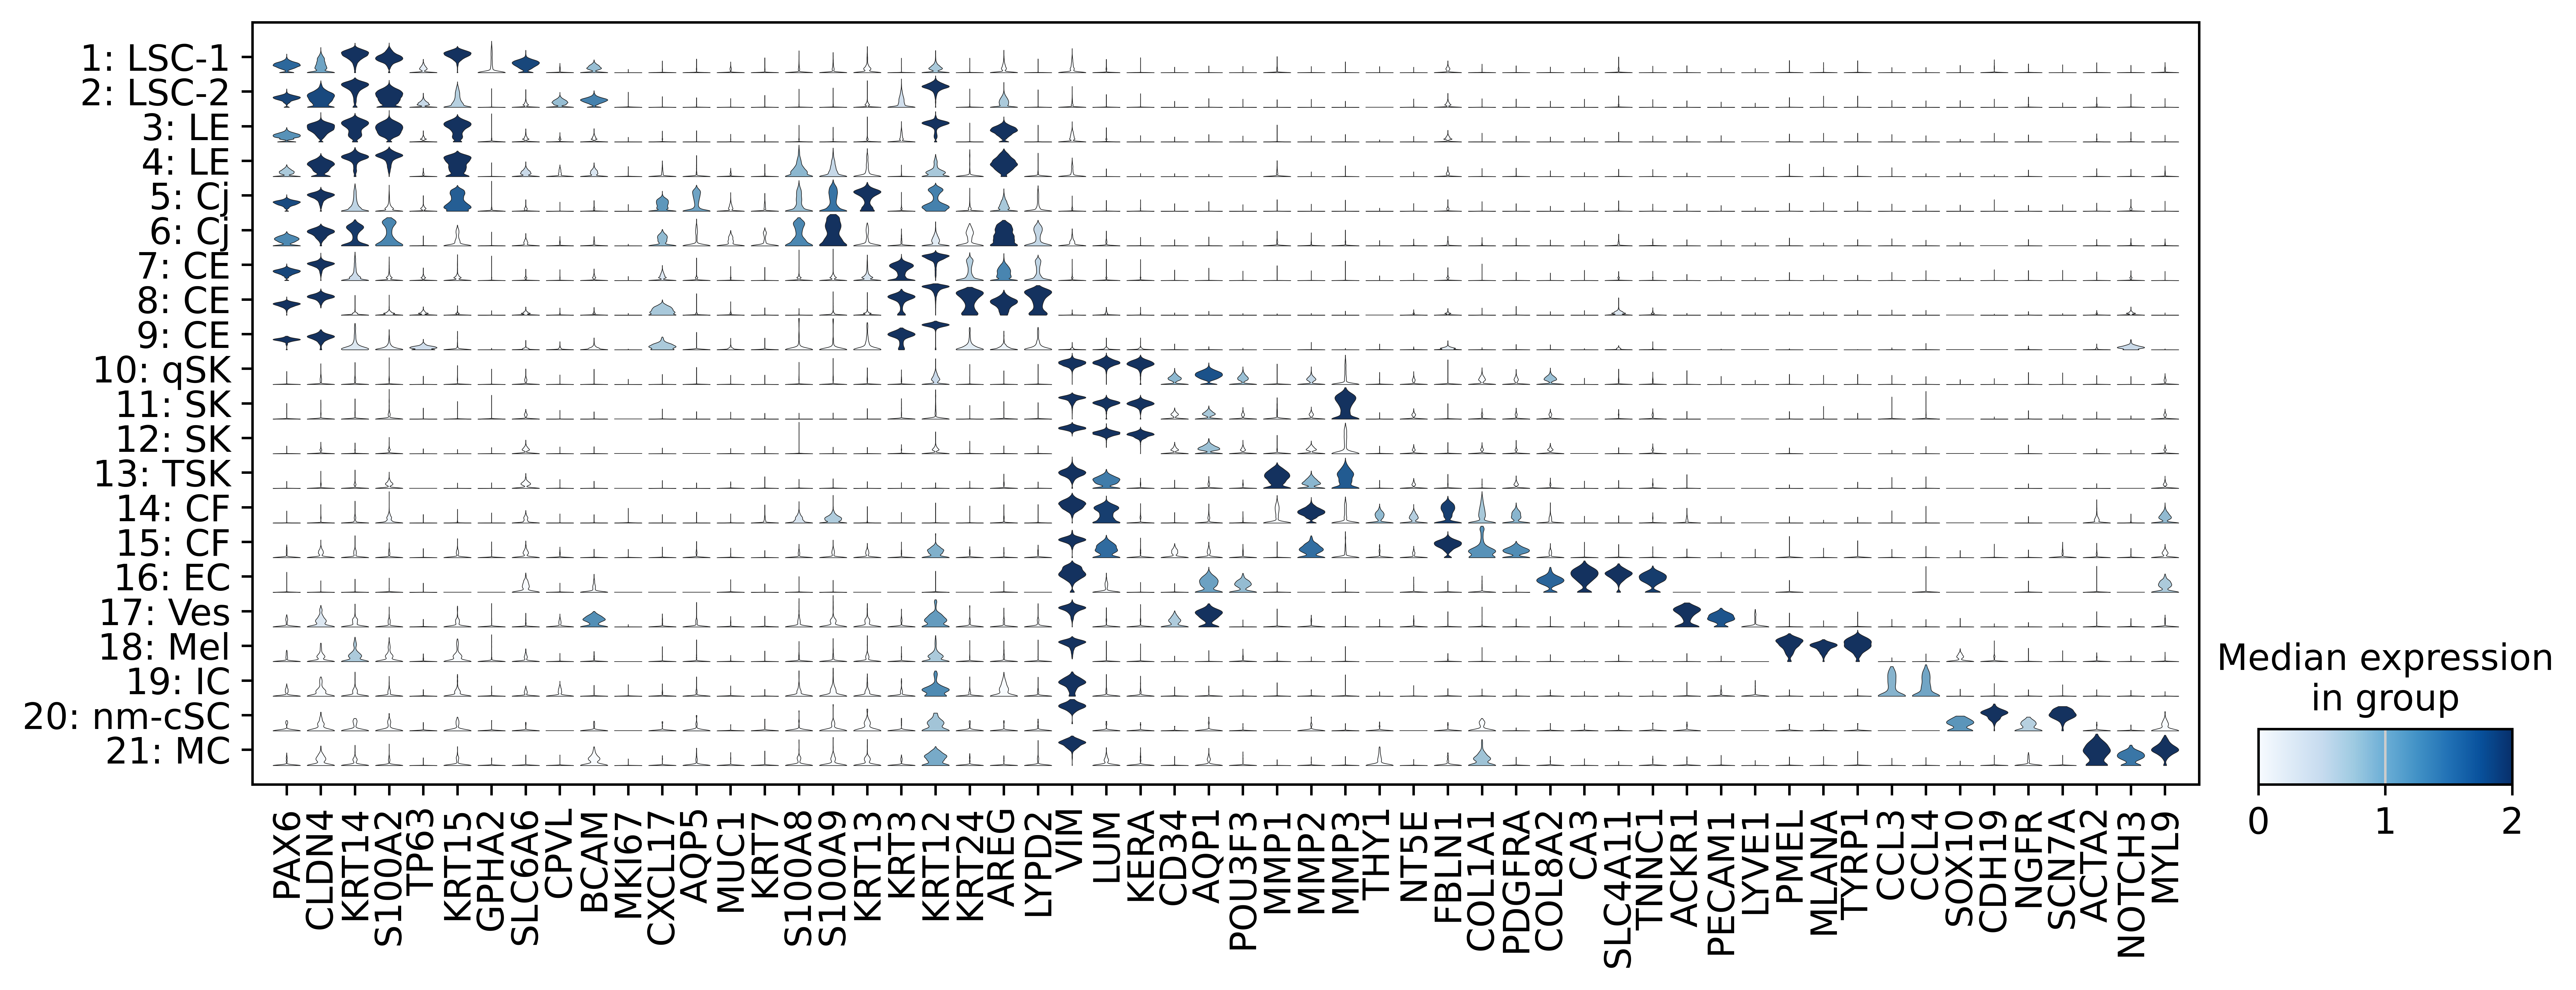

In [13]:
sc.set_figure_params(dpi=400, dpi_save=400)
sc.pl.stacked_violin(test_obj, markers, groupby="latest",vmax=2,figsize=[13,4.5],var_group_rotation=45)

In [8]:
test_obj.obs["latest"].to_list()

['5: Cj',
 '5: Cj',
 '5: Cj',
 '10: qSK',
 '2: LSC-2',
 '7: CE',
 '5: Cj',
 '10: qSK',
 '7: CE',
 '5: Cj',
 '5: Cj',
 '7: CE',
 '10: qSK',
 '10: qSK',
 '5: Cj',
 '10: qSK',
 '5: Cj',
 '10: qSK',
 '1: LSC-1',
 '5: Cj',
 '18: Mel',
 '5: Cj',
 '10: qSK',
 '5: Cj',
 '18: Mel',
 '2: LSC-2',
 '7: CE',
 '2: LSC-2',
 '15: CF',
 '17: Ves',
 '15: CF',
 '15: CF',
 '5: Cj',
 '2: LSC-2',
 '5: Cj',
 '10: qSK',
 '5: Cj',
 '7: CE',
 '1: LSC-1',
 '10: qSK',
 '7: CE',
 '1: LSC-1',
 '5: Cj',
 '21: MC',
 '5: Cj',
 '10: qSK',
 '1: LSC-1',
 '2: LSC-2',
 '21: MC',
 '7: CE',
 '10: qSK',
 '15: CF',
 '10: qSK',
 '10: qSK',
 '1: LSC-1',
 '15: CF',
 '5: Cj',
 '1: LSC-1',
 '10: qSK',
 '10: qSK',
 '2: LSC-2',
 '7: CE',
 '10: qSK',
 '5: Cj',
 '10: qSK',
 '7: CE',
 '5: Cj',
 '5: Cj',
 '11: SK',
 '2: LSC-2',
 '5: Cj',
 '10: qSK',
 '15: CF',
 '7: CE',
 '5: Cj',
 '10: qSK',
 '5: Cj',
 '15: CF',
 '5: Cj',
 '17: Ves',
 '7: CE',
 '10: qSK',
 '5: Cj',
 '15: CF',
 '10: qSK',
 '1: LSC-1',
 '5: Cj',
 '7: CE',
 '1: LSC-1',
 '10

In [9]:
name_list= ['1: LSC-1',
 '2: LSC-2',
 '3: LE',
 '4: LE',
 '5: Cj',
 '6: Cj',
 '7: CE',
 '8: CE',
 '9: CE',
 '10: qSK',
 '11: SK',
 '12: SK',
 '13: TSK',
 '14: CF',
 '15: CF',
 '16: EC',
 '17: Ves',
 '18: Mel',
 '19: IC',
 '20: nm-cSC',
 '21: MC']

col_list = ["#66CD00","#76EE00","#76EEC6","#66CDAA","#38286A","#3E3990","#4E60AB","#516BB2","#5377BA","#F3C739","#F7B837","#F9A834","#F79830","#F48329",
"#F27221","#87CEFA","#8B2323","#FFFF00","#00CED1","#FF0000","#CD3700"]
	
col_dict = dict(zip(name_list,col_list))
colors=col_dict

test_obj.uns[f"{"latest"}_colors"] = [
    colors[cat] for cat in test_obj.obs["latest"].cat.categories
]

In [10]:
test_obj.obs["latest"] = test_obj.obs["latest"].astype("str")

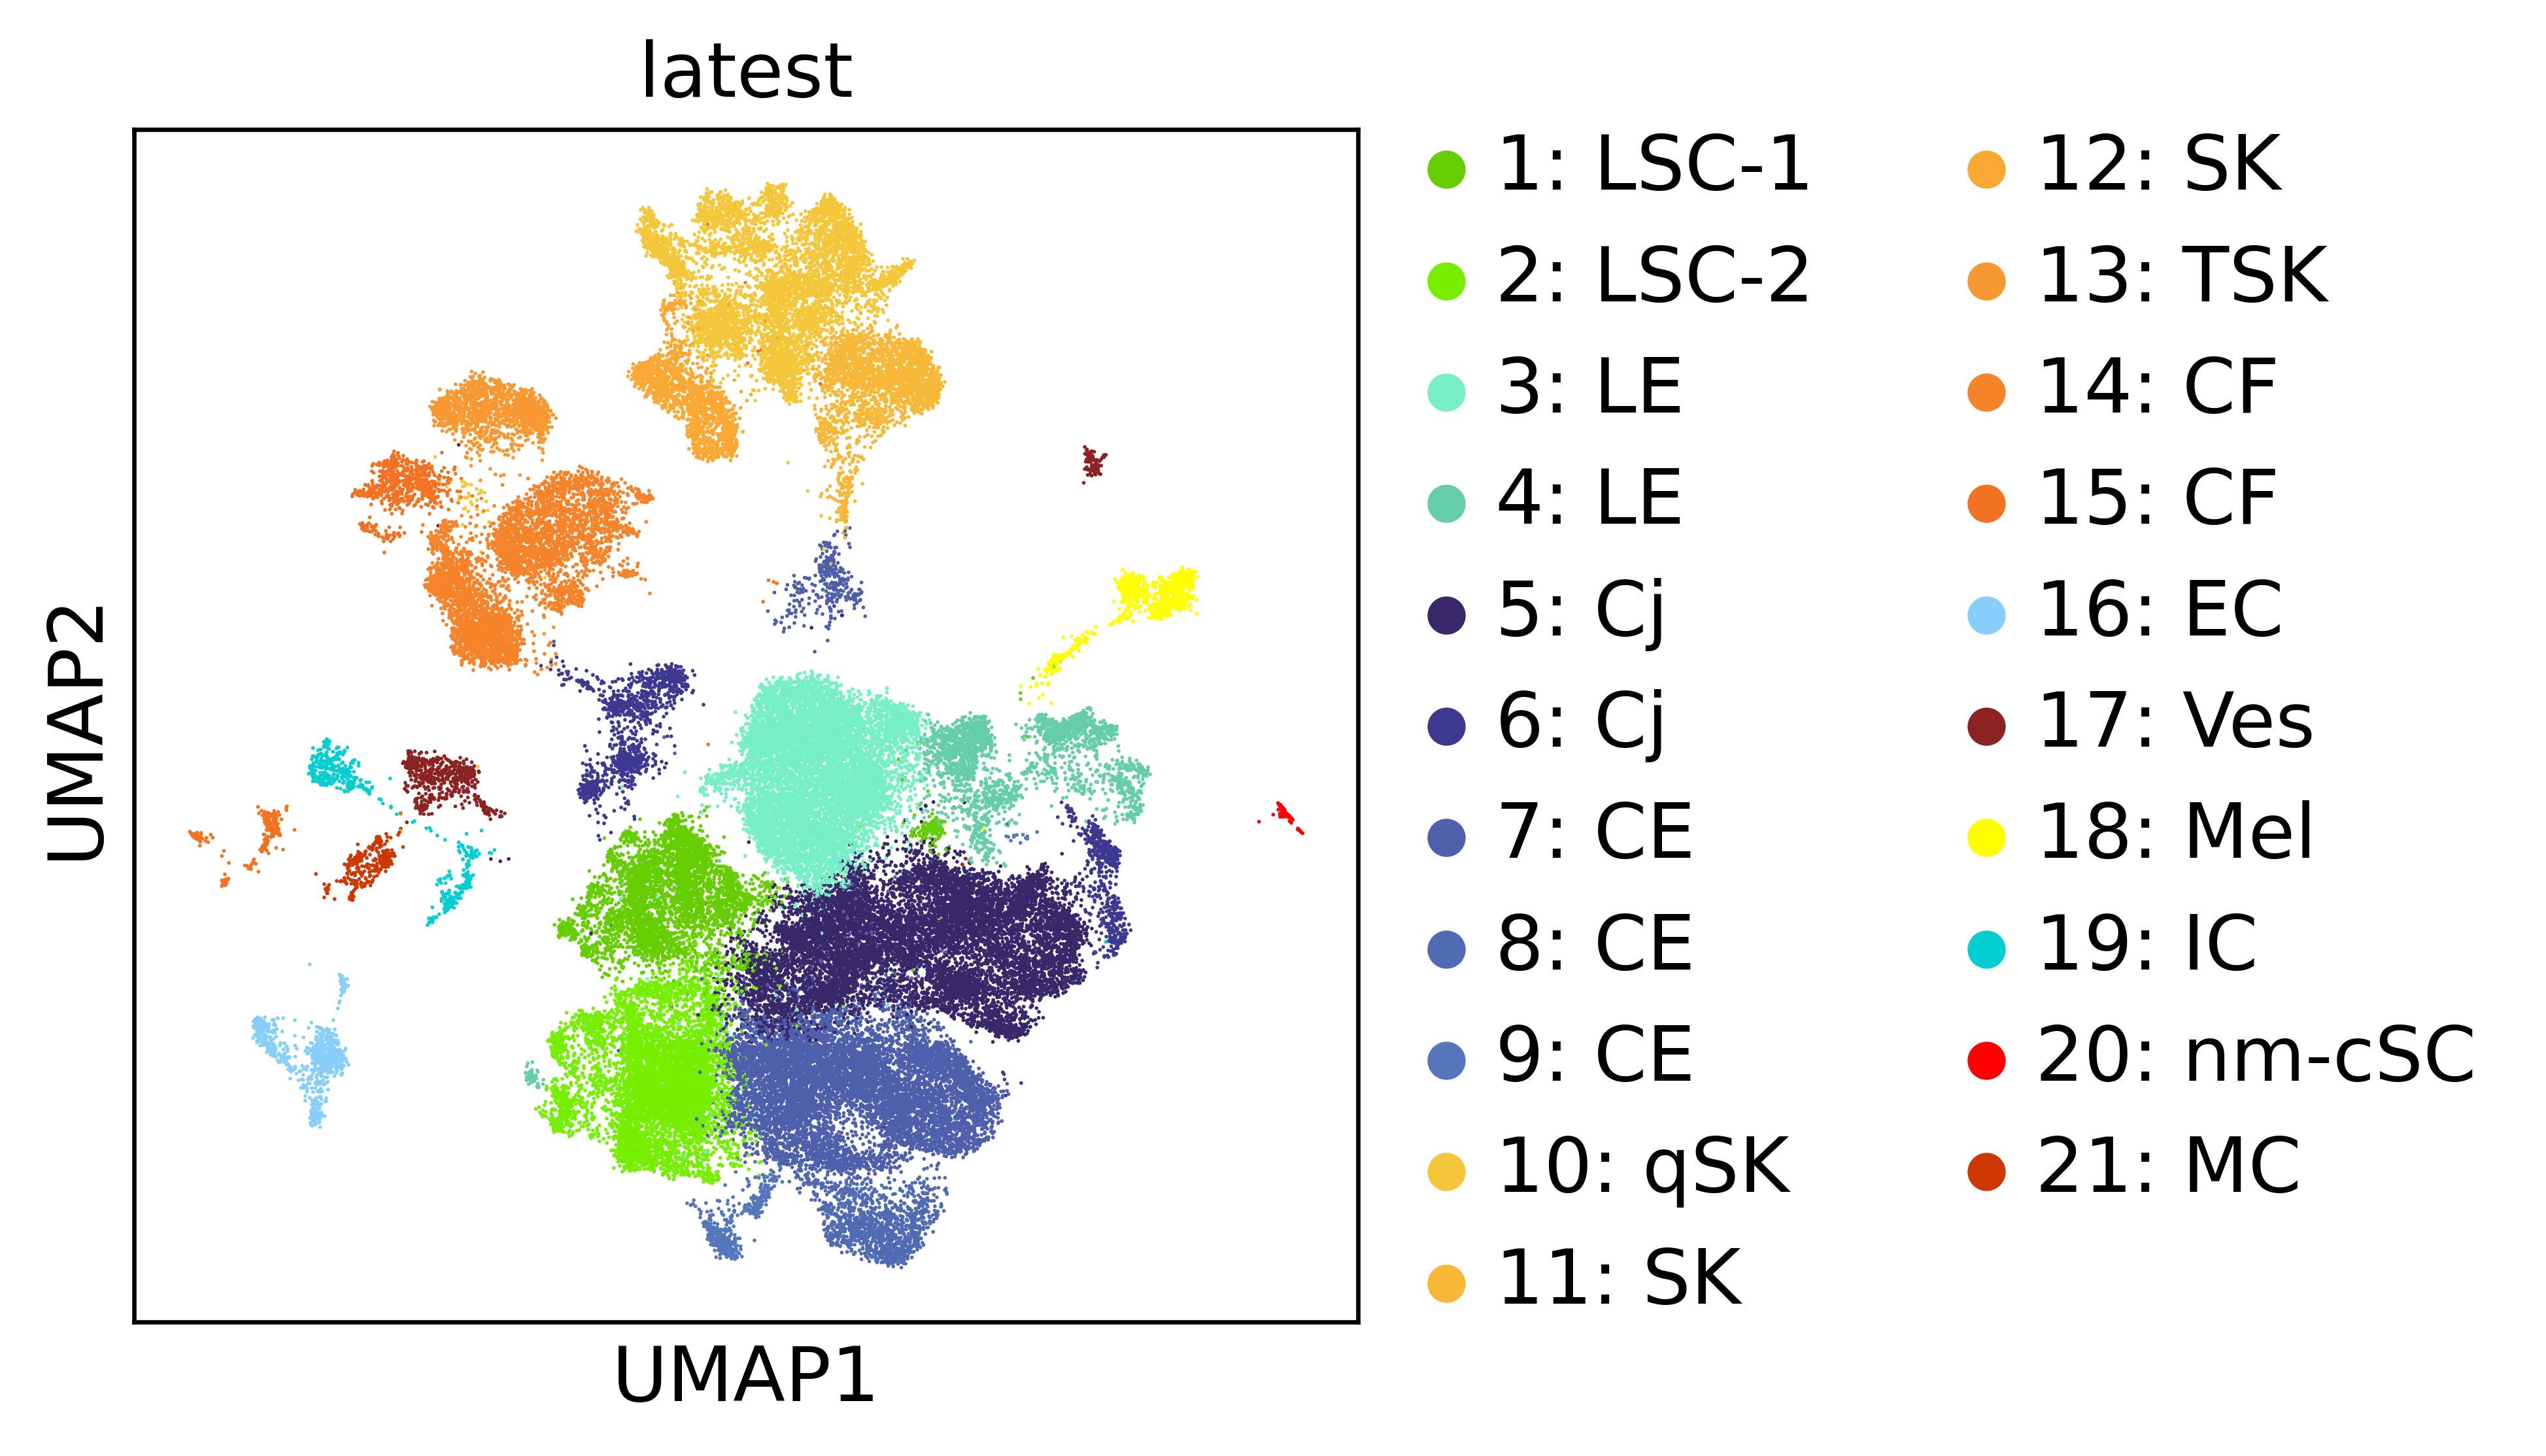

In [11]:
sc.pl.umap(test_obj, color="latest",palette=colors, legend_fontsize=14)

In [12]:
# Perform PROGENy analysis on latest object
import scanpy as sc
import decoupler as dc

# Plotting options, change to your liking
sc.settings.set_figure_params(dpi=300, frameon=False)
sc.set_figure_params(dpi=300)
sc.set_figure_params(figsize=(4, 4))

In [13]:
progeny = dc.get_progeny(organism='human', top=500)
progeny

/usr/share/miniconda3/envs/JA_scenic/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


source   target     weight       p_value
0     Androgen  TMPRSS2  11.490631  0.000000e+00
1     Androgen   NKX3-1  10.622551  2.242078e-44
2     Androgen   MBOAT2  10.472733  4.624285e-44
3     Androgen     KLK2  10.176186  1.944414e-40
4     Androgen     SARG  11.386852  2.790209e-40
...        ...      ...        ...           ...
6995       p53    ZMYM4  -2.325752  1.522388e-06
6996       p53    CFDP1  -1.628168  1.526045e-06
6997       p53   VPS37D   2.309503  1.537098e-06
6998       p53    TEDC1  -2.274823  1.547037e-06
6999       p53  CCDC138  -3.205113  1.568160e-06

[7000 rows x 4 columns]

In [14]:
dc.run_mlm(
    mat=test_obj,
    net=progeny,
    source='source',
    target='target',
    weight='weight',
    verbose=True,
    use_raw=False
)

97 features of mat are empty, they will be removed.
Running mlm on mat with 65036 samples and 27559 targets for 14 sources.


100%|██████████| 7/7 [01:58<00:00, 16.87s/it]


In [15]:
test_obj.obsm['mlm_estimate']

Androgen      EGFR  Estrogen  \
Collin_SRR12386359_AAACGAACAAGTTCGT-1  2.040072  1.339011 -2.878689   
Collin_SRR12386359_AAACGAACATCAGTGT-1  2.980493  2.635784 -5.193176   
Collin_SRR12386359_AAACGAATCGCCTTTG-1  1.124470  0.673132 -2.643453   
Collin_SRR12386359_AAACGAATCTCGCTTG-1  4.343392  3.672414  0.870960   
Collin_SRR12386359_AAACGCTAGCCTATTG-1  1.683697  2.129632 -1.389841   
...                                         ...       ...       ...   
Gautam_SRR14742511_TTTGGTTTCCGTAGGC-1  7.009141 -0.672322 -0.717970   
Gautam_SRR14742511_TTTGTTGAGGATGTTA-1  2.577137 -0.161888 -2.153507   
Gautam_SRR14742511_TTTGTTGCAGCCATTA-1  4.699308 -1.117511 -0.269396   
Gautam_SRR14742511_TTTGTTGTCCTATTTG-1  3.142264 -1.576295 -0.563433   
Gautam_SRR14742511_TTTGTTGTCGGAGTAG-1  4.265358  4.045422  0.972224   

                                         Hypoxia  JAK-STAT      MAPK  \
Collin_SRR12386359_AAACGAACAAGTTCGT-1   4.762333  1.287334 -2.965159   
Collin_SRR12386359_AAACGAACATCAGTGT-1   1.921645  3.704818 -5.340609   
Collin_SRR12386359_AAACGAATCGCCTTTG-1   3.665033  1.879822 -3.462450   
Collin_SRR12386359_AAACGAATCTCGCTTG-1  12.016253  2.201153  1.220035   
Collin_SRR12386359_AAACGCTAGCCTATTG-1   5.333549 -1.003454 -3.240187   
...                                          ...       ...       ...   
Gautam_SRR14742511_TTTGGTTTCCGTAGGC-1   9.462417  1.692562  2.915068   
Gautam_SRR14742511_TTTGTTGAGGATGTTA-1   7.779093  2.568520 -1.166844   
Gautam_SRR14742511_TTTGTTGCAGCCATTA-1   6.724590  2.780902 -0.167092   
Gautam_SRR14742511_TTTGTTGTCCTATTTG-1   5.734187  0.634277  1.085920   
Gautam_SRR14742511_TTTGTTGTCGGAGTAG-1   6.415119  1.739579  1.254987   

                                           NFkB      PI3K      TGFb      TNFa  \
Collin_SRR12386359_AAACGAACAAGTTCGT-1 -2.173166 -5.004412  3.138434  3.053675   
Collin_SRR12386359_AAACGAACATCAGTGT-1 -2.541369 -4.427720  2.315215  3.659759   
Collin_SRR12386359_AAACGAATCGCCTTTG-1 -3.532438 -4.566832  1.796255  3.687337   
Collin_SRR12386359_AAACGAATCTCGCTTG-1  2.952742 -4.141812  5.054038  0.462635   
Collin_SRR12386359_AAACGCTAGCCTATTG-1 -0.171474 -1.937842  1.559801  0.459148   
...                                         ...       ...       ...       ...   
Gautam_SRR14742511_TTTGGTTTCCGTAGGC-1  3.144295 -1.164642  4.807252 -1.408210   
Gautam_SRR14742511_TTTGTTGAGGATGTTA-1  0.142905 -3.453064 -0.261322  0.122296   
Gautam_SRR14742511_TTTGTTGCAGCCATTA-1 -0.538646 -2.610361  2.936741  0.977288   
Gautam_SRR14742511_TTTGTTGTCCTATTTG-1  0.681260 -4.516351  2.188313  0.069780   
Gautam_SRR14742511_TTTGTTGTCGGAGTAG-1  2.724633 -4.041952  6.652576 -0.125652   

                                          Trail      VEGF       WNT       p53  
Collin_SRR12386359_AAACGAACAAGTTCGT-1 -2.110646 -0.596965 -1.063843 -5.521100  
Collin_SRR12386359_AAACGAACATCAGTGT-1 -1.178926 -1.632382 -0.568176 -5.204777  
Collin_SRR12386359_AAACGAATCGCCTTTG-1 -1.089788 -0.343404 -1.015230 -5.383512  
Collin_SRR12386359_AAACGAATCTCGCTTG-1 -3.761493 -0.721411 -0.548406 -5.761259  
Collin_SRR12386359_AAACGCTAGCCTATTG-1 -1.961623 -0.372627 -1.036604 -7.582942  
...                                         ...       ...       ...       ...  
Gautam_SRR14742511_TTTGGTTTCCGTAGGC-1 -3.946664 -0.221063 -1.633589 -3.359719  
Gautam_SRR14742511_TTTGTTGAGGATGTTA-1 -3.177792 -1.171645  0.543494 -8.277330  
Gautam_SRR14742511_TTTGTTGCAGCCATTA-1 -3.745071  0.579668  0.406916 -8.445251  
Gautam_SRR14742511_TTTGTTGTCCTATTTG-1 -4.053048  0.582643  0.682174 -7.486814  
Gautam_SRR14742511_TTTGTTGTCGGAGTAG-1 -3.899414 -1.022121  0.469868 -3.128900  

[65036 rows x 14 columns]

In [16]:
test_obj.obsm['progeny_mlm_estimate'] = test_obj.obsm['mlm_estimate'].copy()
test_obj.obsm['progeny_mlm_pvals'] = test_obj.obsm['mlm_pvals'].copy()
test_obj

AnnData object with n_obs × n_vars = 65036 × 27656
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'percent.mt', 'S.Score', 'G2M.Score', 'Phase', 'old.ident', 'RNA_snn_res.0.15', 'seurat_clusters', 'costum_clustering', 'Condition', 'pANN_0.25_0.06_1806', 'DF.classifications_0.25_0.06_1806', 'pANN_0.25_0.005_1289', 'DF.classifications_0.25_0.005_1289', 'RNA_snn_res.0.1', 'pANN_0.25_0.18_1347', 'DF.classifications_0.25_0.18_1347', 'pANN_0.25_0.14_831', 'DF.classifications_0.25_0.14_831', 'batch', '_scvi_batch', '_scvi_labels', 'leiden', 'leiden_0.0', 'leiden_0.05', 'leiden_0.1', 'leiden_0.15', 'leiden_0.2', 'leiden_0.25', 'leiden_0.3', 'leiden_0.35', 'leiden_0.4', 'leiden_0.45', 'leiden_0.5', 'leiden_0.55', 'leiden_0.6', 'leiden_0.65', 'leiden_0.7', 'leiden_0.75', 'leiden_0.8', 'leiden_0.85', 'leiden_0.9', 'leiden_0.95', 'leiden_anno', 'latest'
    var: 'features'
    uns: '_scvi', 'batch_colors', 'costum_clustering_colors', 'hvg', 'leiden', 'leiden_anno_colors', 'leiden_colors', 'n

In [17]:
# Join similar cell states together
dict_cellstates={
    "1: LSC-1": "LSC-1",
    "2: LSC-2": "LSC-2",
    "3: LE": "LE",
    "4: LE": "LE",
    "5: Cj": "Cj",
    "6: Cj": "Cj",
    "7: CE": "CE",
    "8: CE": "CE",
    "9: CE": "CE",
    "10: qSK": "qSK",
    "11: SK": "SK",
    "12: SK": "SK",
    "13: TSK": "TSK",
    "14: CF": "CF",
    "15: CF": "CF",
    "16: EC": "EC",
    "17: Ves": "Ves",
    "18: Mel": "Mel",
    "19: IC": "IC",
    "20: nm-cSC": "nm-cSC",
    "21: MC": "MC"
    }

test_obj.obs["latestjoined"] = test_obj.obs["latest"].map(dict_cellstates)
test_obj.obs["latestjoined"] = test_obj.obs["latestjoined"].astype("category")
test_obj.obs["latestjoined"] = test_obj.obs["latestjoined"].cat.set_categories(['LSC-1',
 'LSC-2',
 'LE',
 'Cj',
 'CE',
 'qSK',
 'SK',
 'TSK',
 'CF',
 'EC',
 'Ves',
 'Mel',
 'IC',
 'nm-cSC',
 'MC'])

test_obj.obs["latestjoined"]

Collin_SRR12386359_AAACGAACAAGTTCGT-1       Cj
Collin_SRR12386359_AAACGAACATCAGTGT-1       Cj
Collin_SRR12386359_AAACGAATCGCCTTTG-1       Cj
Collin_SRR12386359_AAACGAATCTCGCTTG-1      qSK
Collin_SRR12386359_AAACGCTAGCCTATTG-1    LSC-2
                                         ...  
Gautam_SRR14742511_TTTGGTTTCCGTAGGC-1       CF
Gautam_SRR14742511_TTTGTTGAGGATGTTA-1    LSC-1
Gautam_SRR14742511_TTTGTTGCAGCCATTA-1    LSC-1
Gautam_SRR14742511_TTTGTTGTCCTATTTG-1    LSC-1
Gautam_SRR14742511_TTTGTTGTCGGAGTAG-1       CF
Name: latestjoined, Length: 65036, dtype: category
Categories (15, object): ['LSC-1', 'LSC-2', 'LE', 'Cj', ..., 'Mel', 'IC', 'nm-cSC', 'MC']

In [18]:
acts = dc.get_acts(test_obj, obsm_key='mlm_estimate')
acts

AnnData object with n_obs × n_vars = 65036 × 14
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'percent.mt', 'S.Score', 'G2M.Score', 'Phase', 'old.ident', 'RNA_snn_res.0.15', 'seurat_clusters', 'costum_clustering', 'Condition', 'pANN_0.25_0.06_1806', 'DF.classifications_0.25_0.06_1806', 'pANN_0.25_0.005_1289', 'DF.classifications_0.25_0.005_1289', 'RNA_snn_res.0.1', 'pANN_0.25_0.18_1347', 'DF.classifications_0.25_0.18_1347', 'pANN_0.25_0.14_831', 'DF.classifications_0.25_0.14_831', 'batch', '_scvi_batch', '_scvi_labels', 'leiden', 'leiden_0.0', 'leiden_0.05', 'leiden_0.1', 'leiden_0.15', 'leiden_0.2', 'leiden_0.25', 'leiden_0.3', 'leiden_0.35', 'leiden_0.4', 'leiden_0.45', 'leiden_0.5', 'leiden_0.55', 'leiden_0.6', 'leiden_0.65', 'leiden_0.7', 'leiden_0.75', 'leiden_0.8', 'leiden_0.85', 'leiden_0.9', 'leiden_0.95', 'leiden_anno', 'latest', 'latestjoined'
    uns: '_scvi', 'batch_colors', 'costum_clustering_colors', 'hvg', 'leiden', 'leiden_anno_colors', 'leiden_colors', 'neighbor

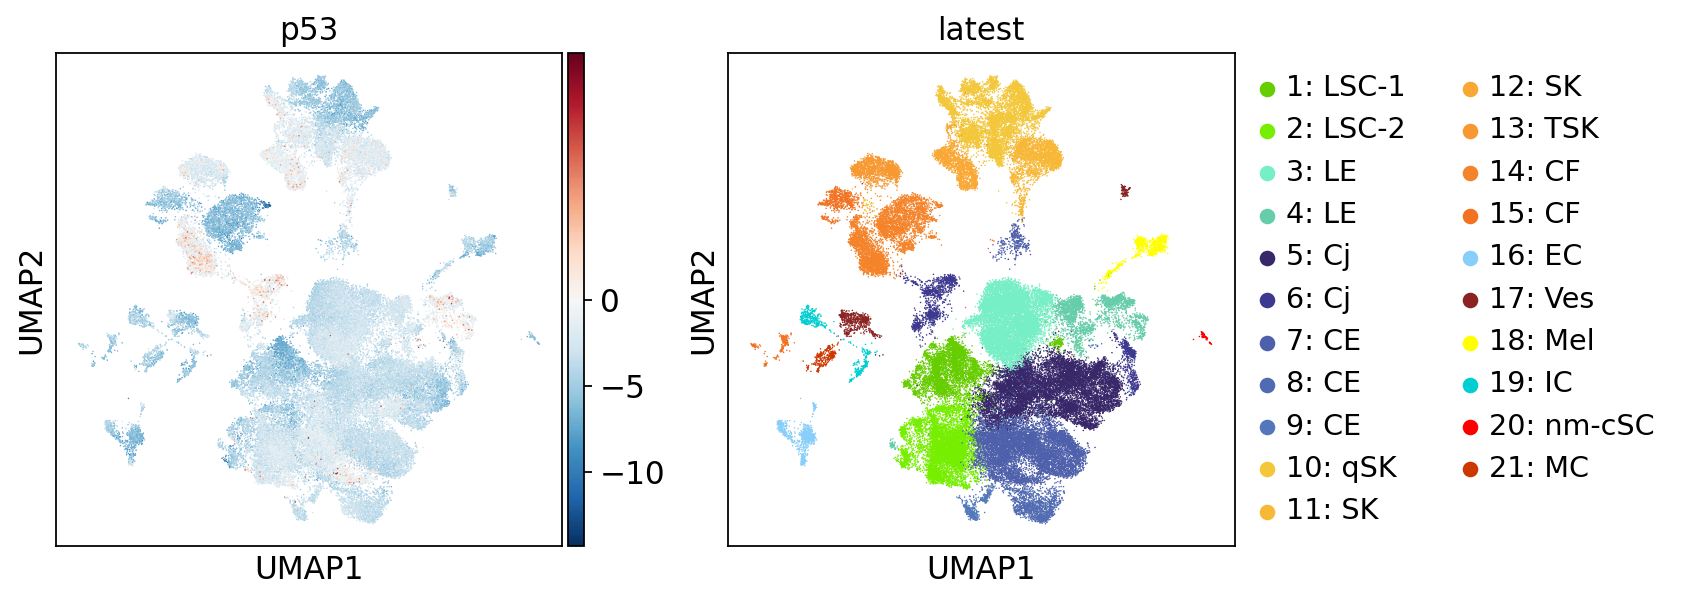

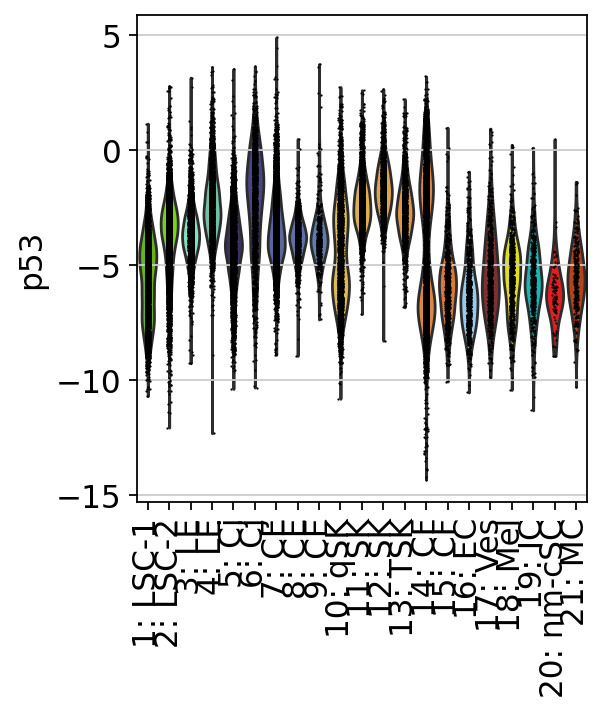

In [19]:
sc.pl.umap(acts, color=['p53', 'latest'], cmap='RdBu_r', vcenter=0)
sc.pl.violin(acts, keys=['p53'], groupby='latest', rotation=90)

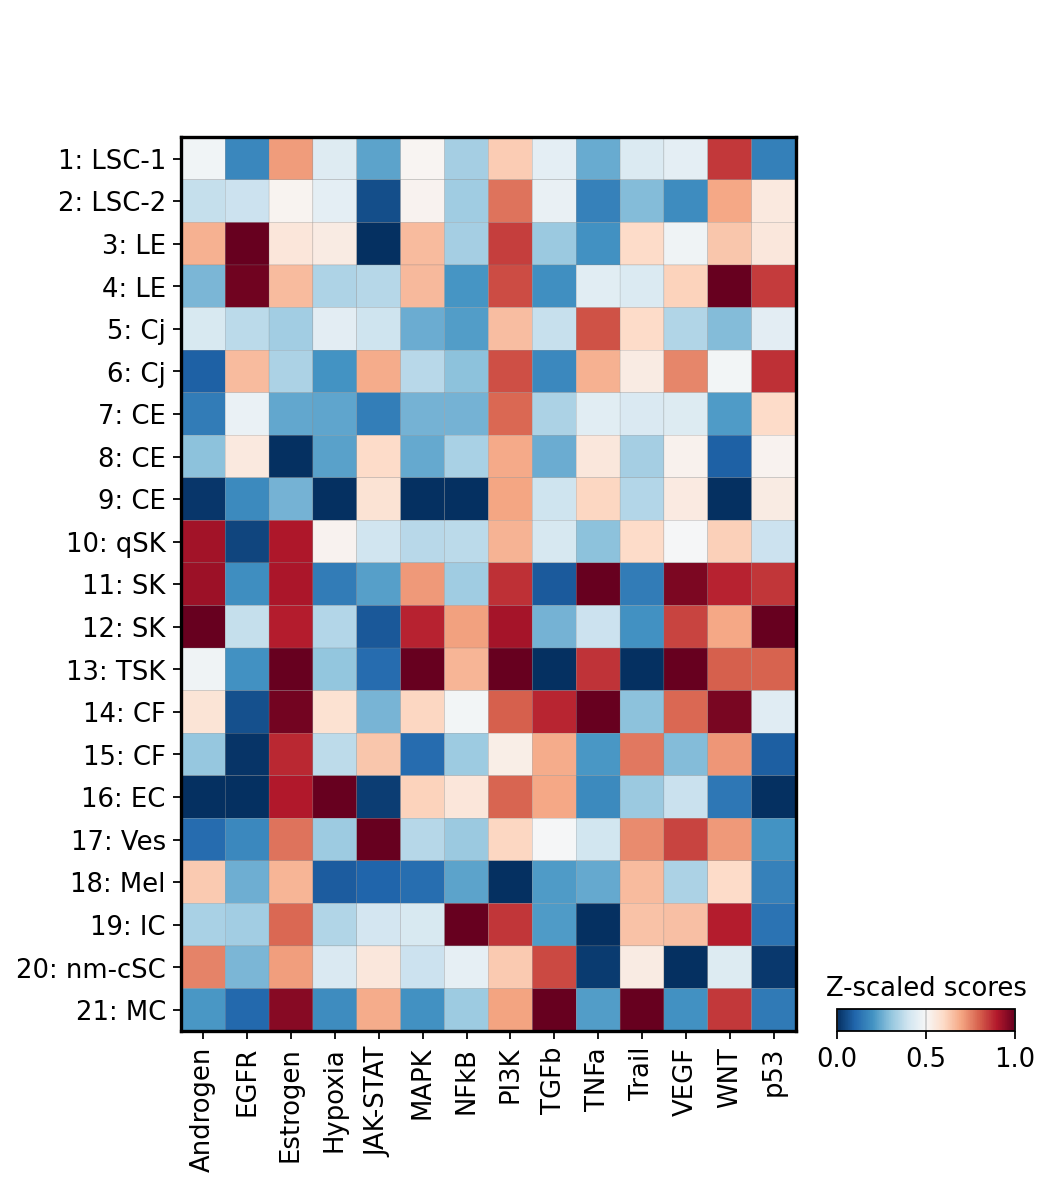

In [20]:
# Standard_scale "var" sets the original progeny scores between 0 and 1 to highlight the differences better
sc.pl.matrixplot(acts, var_names=acts.var_names, groupby='latest', dendrogram=False, standard_scale='var',
                 colorbar_title='Z-scaled scores', cmap='RdBu_r')

In [21]:
acts.var_names

Index(['Androgen', 'EGFR', 'Estrogen', 'Hypoxia', 'JAK-STAT', 'MAPK', 'NFkB',
       'PI3K', 'TGFb', 'TNFa', 'Trail', 'VEGF', 'WNT', 'p53'],
      dtype='object')

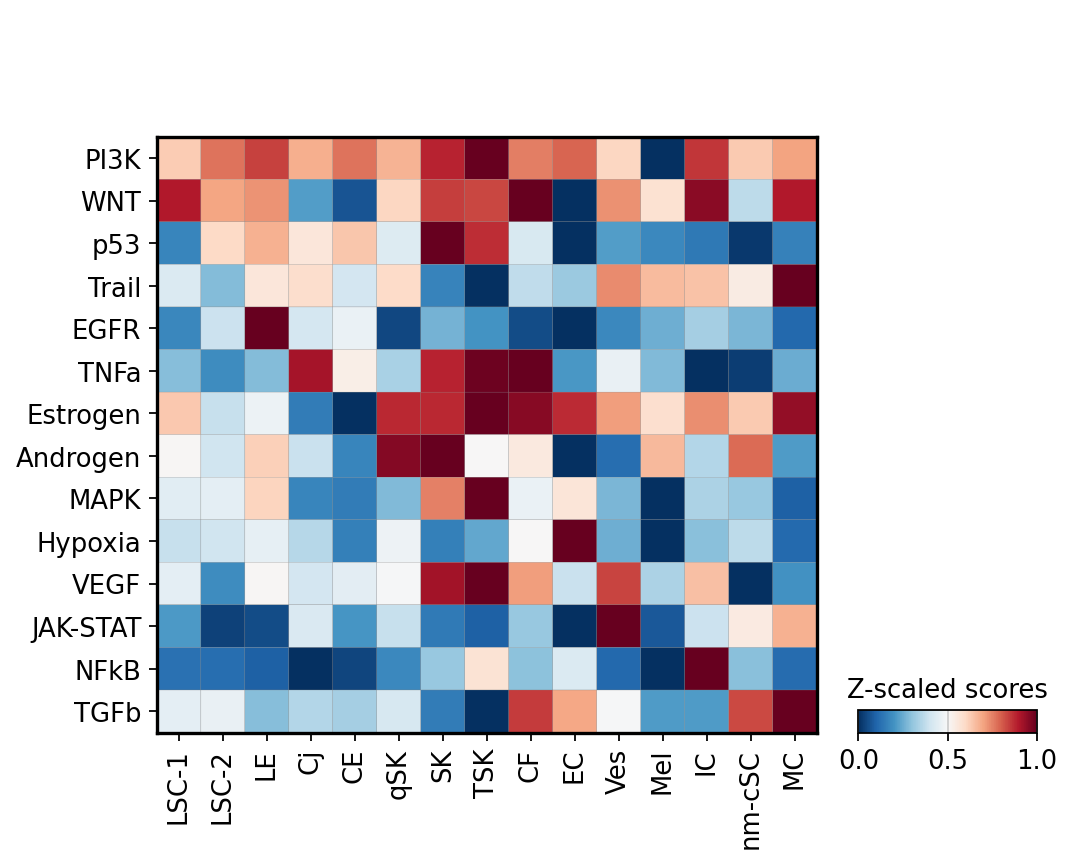

In [33]:
# Standard_scale "var" sets the original progeny scores between 0 and 1 to highlight the differences better
sc.pl.matrixplot(acts, var_names=["PI3K","WNT","p53","Trail","EGFR","TNFa","Estrogen","Androgen","MAPK","Hypoxia","VEGF","JAK-STAT","NFkB","TGFb"], groupby='latestjoined', dendrogram=False, standard_scale='var',
                 colorbar_title='Z-scaled scores', cmap='RdBu_r', swap_axes=True)